---

## 데이터 설정

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pm_df = pd.read_csv("C:/Users/hanma/Downloads/project.csv")
pm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17075 entries, 0 to 17074
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17075 non-null  int64  
 1   location       17075 non-null  object 
 2   NO2            16601 non-null  float64
 3   O3             16673 non-null  float64
 4   CO2            16585 non-null  float64
 5   SO2            16607 non-null  float64
 6   PM10           16488 non-null  float64
 7   PM2.5          16492 non-null  float64
 8   alert          17075 non-null  int64  
 9   windspeed      17075 non-null  float64
 10  winddirection  17075 non-null  int64  
 11  precipitation  17075 non-null  float64
 12  coalused       0 non-null      float64
dtypes: float64(9), int64(3), object(1)
memory usage: 1.7+ MB


In [3]:
# 사용하지 않는 features drop
pm_df.drop(labels='coalused', axis=1, inplace=True)
pm_df.drop(labels='alert', axis=1, inplace=True)

In [4]:
# 결측치 확인
pd.isnull(pm_df)
pm_df.isnull().sum()

date               0
location           0
NO2              474
O3               402
CO2              490
SO2              468
PM10             587
PM2.5            583
windspeed          0
winddirection      0
precipitation      0
dtype: int64

In [5]:
#결측치 제거
pm_df.dropna(axis=0,how='any', inplace=True)

In [6]:
pm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 0 to 17074
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16173 non-null  int64  
 1   location       16173 non-null  object 
 2   NO2            16173 non-null  float64
 3   O3             16173 non-null  float64
 4   CO2            16173 non-null  float64
 5   SO2            16173 non-null  float64
 6   PM10           16173 non-null  float64
 7   PM2.5          16173 non-null  float64
 8   windspeed      16173 non-null  float64
 9   winddirection  16173 non-null  int64  
 10  precipitation  16173 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


### column 정보
- date : 일자
- location : 지역 정보
- NO2 : 이산화질소
- O3 : 오존
- CO2 : 이산화탄소
- SO2 : 이산화황
- PM10 : 미세먼지
- PM2.5 : 대기질 지수
- alert : 주의경보
- windspeed : 풍속
- winddirection : 풍향
- precipitation : 강수량
- coalused : 석탄 

In [7]:
#미세먼지 경보는 서울 전체를 기준으로 발령되기 때문에 날짜를 기준으로 그룹화하고 해당 지수들을 각 측정소의 평균 값으로 데이터 처리
df_seoul = pm_df.groupby(['date'], as_index=False).agg({'NO2':'mean','O3':'mean','CO2':'mean','SO2':'mean','PM10':'mean','PM2.5':'mean','windspeed':'mean', \
                                                        'winddirection':'mean','precipitation':'mean'})
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,windspeed,winddirection,precipitation
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,2.1,290.0,0.0
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,1.7,270.0,0.0
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,1.4,290.0,0.0
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,1.2,20.0,0.0
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,2.2,290.0,0.0


In [8]:
#미세먼지 농도 기준별 좋음(0), 보통(1), 나쁨(2), 매우나쁨(3)으로 라벨 설정
df_seoul['PM10_class'] = -1

for (idx, row) in df_seoul.iterrows():
    pm10 = row[5]
    _class = -1
    if pm10 < 0:
        continue
    elif pm10 < 30:
        _class = 0
    elif pm10 < 80:
        _class = 1
    elif pm10 < 150:
        _class = 2
    else:
        _class = 3
    df_seoul.loc[idx, 'PM10_class'] = _class
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,windspeed,winddirection,precipitation,PM10_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,2.1,290.0,0.0,1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,1.7,270.0,0.0,1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,1.4,290.0,0.0,1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,1.2,20.0,0.0,1
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,2.2,290.0,0.0,1


In [9]:
df_seoul['PM10_class'].unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
#초미세먼지 농도 기준별 좋음(0), 보통(1), 나쁨(2), 매우나쁨(3)으로 라벨 설정
df_seoul['PM2.5_class'] = -1

for (idx, row) in df_seoul.iterrows():
    pm25 = row[6]
    _class = -1
    if pm25 < 0:
        continue
    elif pm25 < 15:
        _class = 0
    elif pm25 < 35:
        _class = 1
    elif pm25 < 75:
        _class = 2
    else:
        _class = 3
    df_seoul.loc[idx, 'PM2.5_class'] = _class
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,windspeed,winddirection,precipitation,PM10_class,PM2.5_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,2.1,290.0,0.0,1,1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,1.7,270.0,0.0,1,1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,1.4,290.0,0.0,1,1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,1.2,20.0,0.0,1,2
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,2.2,290.0,0.0,1,2


In [11]:
df_seoul['PM2.5_class'].unique()


array([1, 2, 3, 0], dtype=int64)

----

## EDA

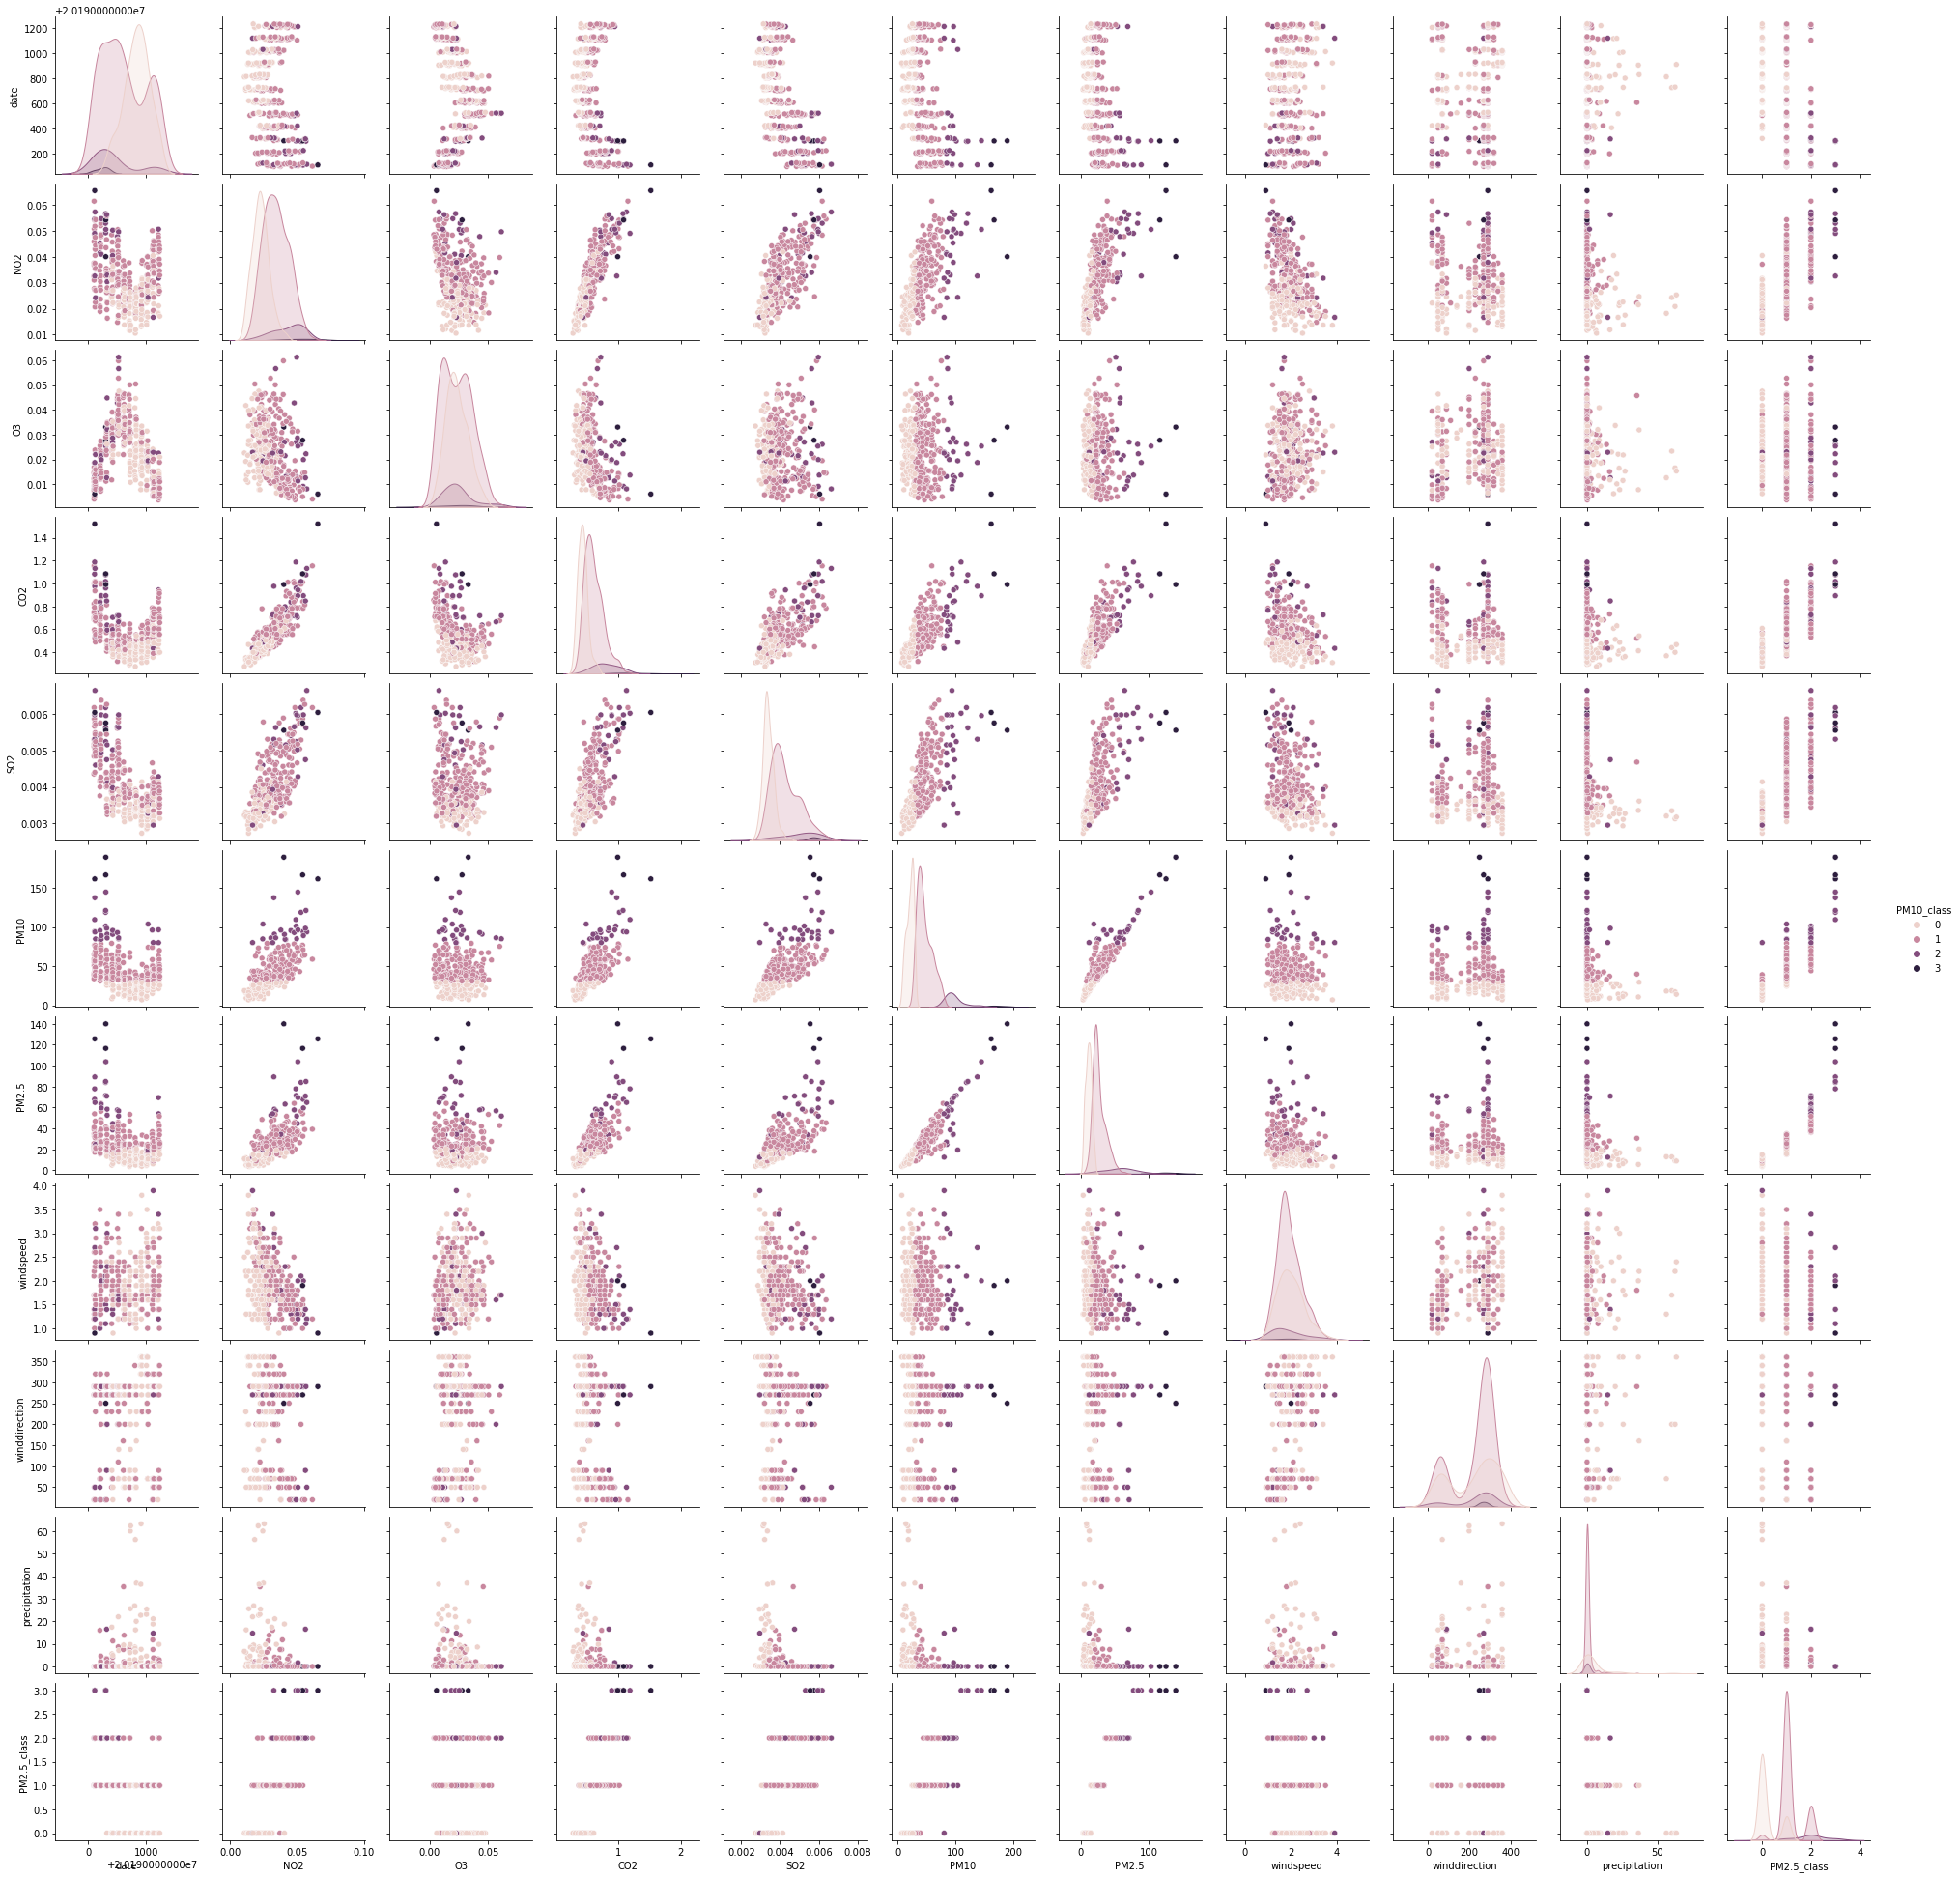

In [37]:
sns.pairplot(df_seoul, hue='PM10_class');


가설을 세울때 풍속과 강수량이 미세먼지에 영향을 줄 것이라고 생각을 하고 가설을 세웠지만 해당 pairplot을 보면 생각보다 영향이 그렇게 크지 않아 보인다.  
계속해서 EDA를 해보자.

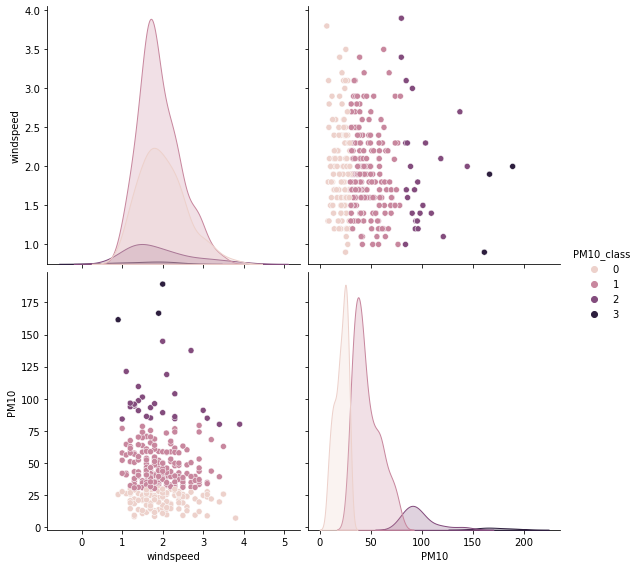

In [38]:
sns.pairplot(df_seoul, vars=['windspeed','PM10'],hue='PM10_class', height=4);

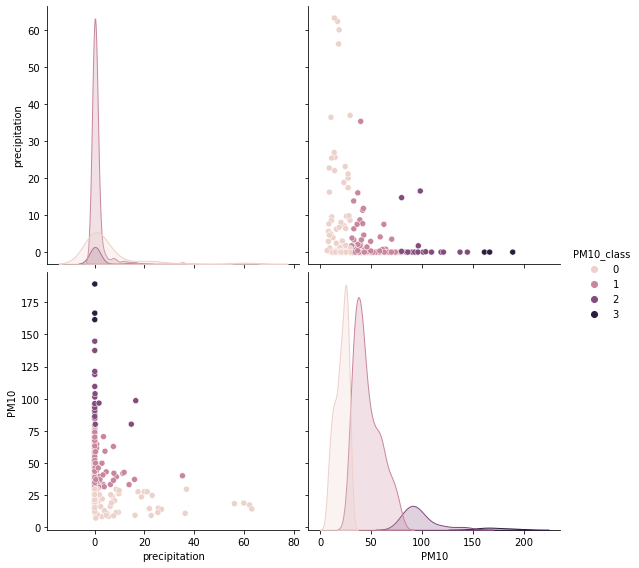

In [39]:
sns.pairplot(df_seoul, vars=['precipitation','PM10'],hue='PM10_class', height=4);

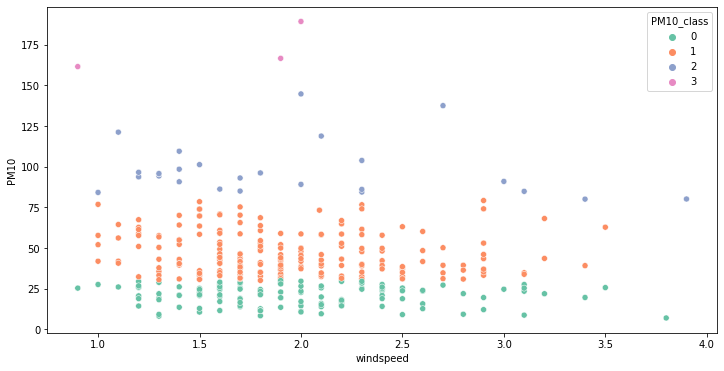

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='windspeed', y='PM10', data=df_seoul, hue='PM10_class', palette="Set2");

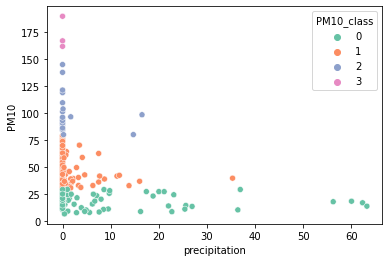

In [41]:
sns.scatterplot(x='precipitation', y='PM10', data=df_seoul, hue='PM10_class', palette="Set2");

---

## 모델 분석

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [13]:
X = df_seoul.drop(['PM10_class','PM10'], axis=1)
y = df_seoul['PM10_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [14]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.8873239436619719
Test ACC :  0.8472222222222222


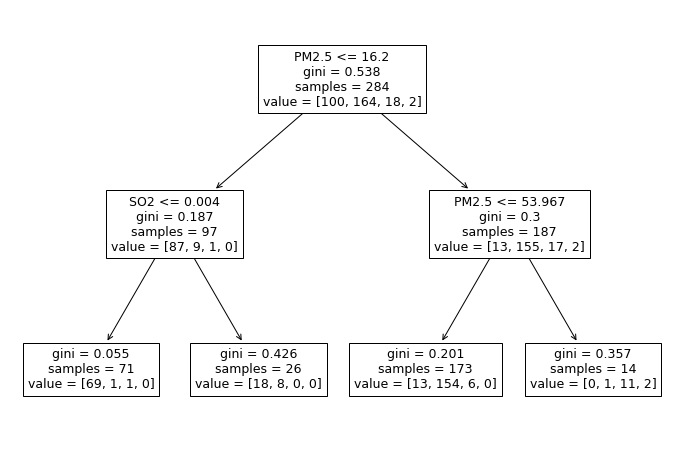

In [15]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

In [16]:
X = df_seoul.drop(['PM2.5_class','PM2.5'], axis=1)
y = df_seoul['PM2.5_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [17]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.8345070422535211
Test ACC :  0.9166666666666666


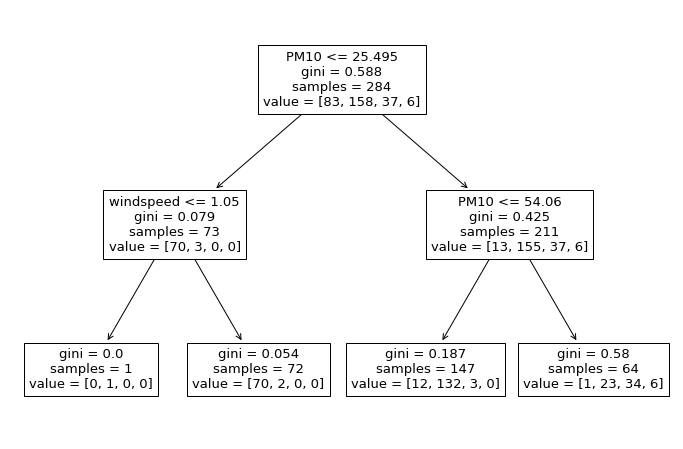

In [18]:
plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

미세먼지와  초미세먼지는 서로 영향이 크므로 해당 features를 모두 제거하여 다시 한번 확인해보자

In [19]:
X = df_seoul.drop(['PM2.5_class','PM2.5','PM10','PM10_class'], axis=1)
y = df_seoul['PM2.5_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [20]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.778169014084507
Test ACC :  0.6666666666666666


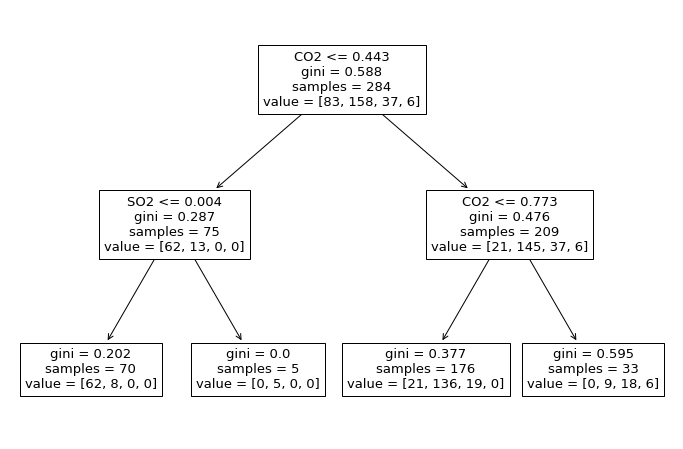

In [21]:
plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

결과 우리가 생각했었던 강수량과 풍향보다 이산화탄소화 이산화황의 농도가 미세먼지 분류에 더 관련이 있는것으로 보인다.

모델을 결정트리말고 랜덤포레스트를 사용해 보자.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [2,4,6,8,10],
    'n_estimators' : [50,100,150,200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 150, 200]})

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [24]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score')

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
39,1,0.753521,200,6
33,1,0.753521,100,6
53,1,0.753521,100,8
35,1,0.753521,200,6
37,1,0.753521,100,6
...,...,...,...,...
11,75,0.721831,200,2
14,75,0.721831,150,2
15,75,0.721831,200,2
4,79,0.718310,50,2


In [25]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [26]:
grid_cv.best_score_

0.7535211267605634

In [27]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [28]:
pred = rf_clf_best.predict(X_test)
accuracy_score(y_test,pred)

0.6944444444444444

In [29]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top_cols = best_cols.sort_values(ascending=False)
top_cols

CO2              0.301540
SO2              0.264436
NO2              0.204746
date             0.079874
O3               0.058668
windspeed        0.040370
winddirection    0.035489
precipitation    0.014877
dtype: float64

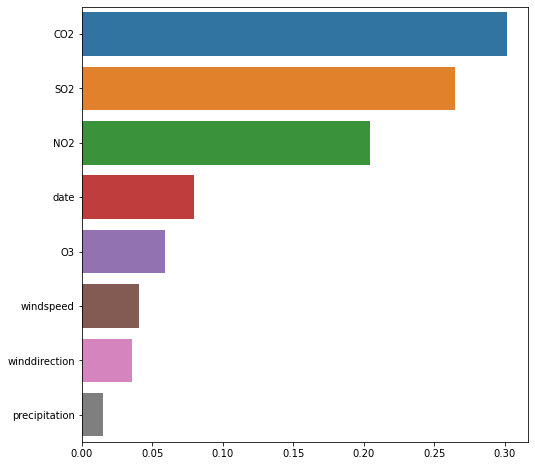

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x=top_cols, y=top_cols.index)
plt.show()

In [50]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score)

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('F1 score : ', f1_score(y_test, pred))

Accuracy :  0.6944444444444444


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score)

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('F1 score : ', f1_score(y_test, pred))

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.68      0.79      0.73        34
           2       0.67      0.40      0.50        15
           3       0.00      0.00      0.00         2

    accuracy                           0.69        72
   macro avg       0.52      0.50      0.50        72
weighted avg       0.67      0.69      0.67        72



c:\Users\hanma\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hanma\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hanma\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        21
           1       0.66      0.74      0.69        34
           2       0.58      0.47      0.52        15
           3       0.00      0.00      0.00         2

    accuracy                           0.67        72
   macro avg       0.49      0.49      0.49        72
weighted avg       0.64      0.67      0.65        72



c:\Users\hanma\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hanma\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hanma\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

결정트리 모델에서는 Train 에서는 78%, Test 에서는 67% 의 Accuracy Score를 보여주고  
랜덤포레스트 모델에서는 70%의 Accurancy Score를 보여준다.  

그리고 결정트리나 랜덤포레스트에서 결정적 features 들은 우리가 가설로 세운 windspeed, precipitation , winddirection  등이 아니라 대기질과 관련이 있고 생각보다 날짜가 더 큰 관련이 있다는 것을 알게 되었다.
해당 결과는 미세먼지 농도가 12월부터 3월까지 심하다는 환경청 분석이 있어 날짜가 생각보다 중요한 feature 였다는것을 알게 해주었다.